## Fast-slow consensus system

We consider the system:

\begin{align}
\dot{\mathbf{x}} &=& -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &=& -\varepsilon
\end{align}

where $[\mathbf{S}(\mathbf{x},u)]_i = S(x_i,u)$

and $S(x,u) = 2x - \frac{x^3}{3} + u$.

Then, $\phi(x,u) = S(x,u) - x$.

Take $\varepsilon = 10^{-4}$.

In [1]:
%run net_sym.py
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
from scipy.integrate import solve_ivp
import pylab
from network2tikz import plot
import matplotlib2tikz as mplt2tikz

In [2]:
N = 4
#g = nx.cycle_graph(N, create_using=nx.DiGraph)
g = get_strongly_connected_digraph(N)

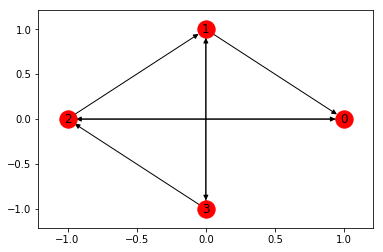

In [3]:
layout_dict = nx.circular_layout(g)
plot(g, "fast_slow_"+str(N)+".tex", standalone=False, layout=layout_dict)
nx.draw_networkx(g, pos=layout_dict)

In [4]:
#g = nx.complete_graph(3, create_using=nx.DiGraph())
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [5]:
from scipy.linalg import orth
from scipy.linalg import null_space

In [6]:
L = D - 2*A

In [7]:
s_xu = lambda x,u: 2*x - np.power(x,3)/3 + u
phi_xu = lambda x,u: x - s_xu(x,u)

x_range = np.arange(-2, 2, 0.01)

p1 = np.argmin(s_xu(x_range[0:100], -1))
p2 = 200 + np.argmax(s_xu(x_range[200:], -1))

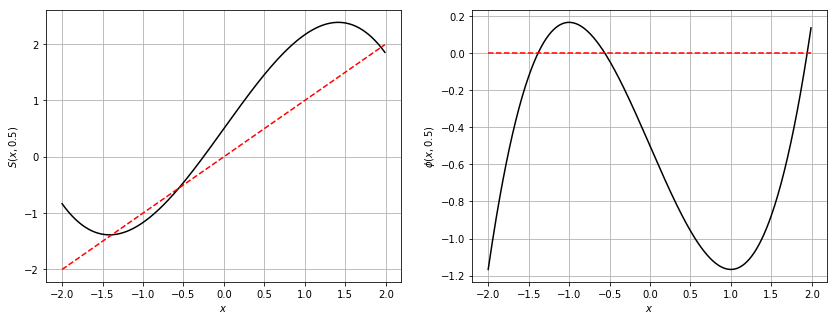

In [8]:
u = 0.5
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(x_range, s_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, x_range, linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$S(x,0.5)$')
plt.grid()

plt.subplot(122)
plt.plot(x_range, phi_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, np.repeat(0,np.size(x_range)), linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,0.5)$')
plt.grid()

Integrate

In [9]:
dt = 0.01
u_range = np.arange(0.7, 1.5, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_n = np.zeros((np.size(u_range), N))

u = 0.5

f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), -1e-4)
res = solve_ivp(fun=f_t, t_span=[0,8000], y0=np.append(1.2 + np.random.rand(N)/10, 0.1), method="BDF")

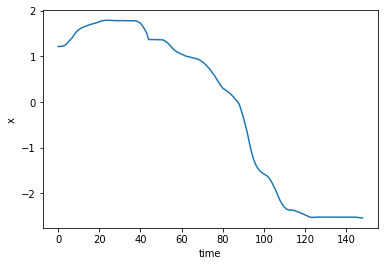

In [10]:
plt.plot(res.y[0,:])
plt.xlabel("time")
plt.ylabel("x")
plt.show()

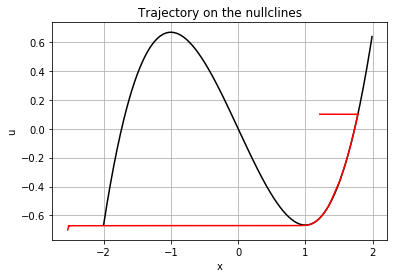

In [11]:
plt.plot(x_range, phi_xu(x_range,0), color='black')
plt.plot(res.y[0,:], res.y[N,:], color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Trajectory on the nullclines')
plt.grid()

### Periodic orbits


We now make a modification to the previous system to get periodic orbits:

\begin{align}
\dot{\mathbf{x}} &=& -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &=& -\frac{\varepsilon}{N} \mathbf{1}_N^T\mathbf{x}
\end{align}

In [12]:
f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), -np.mean(x[:-1])*1e-4)
res2 = solve_ivp(fun=f_t, t_span=[0,40000], y0=np.append(1.2 + np.random.rand(N)/10, 0.1), method='BDF')

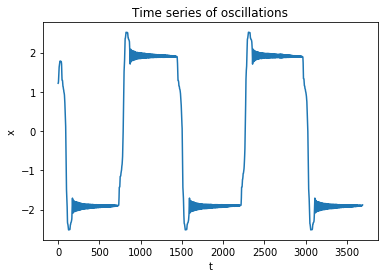

In [13]:
plt.plot(res2.y[0,:])
plt.xlabel("t")
plt.ylabel("x")
plt.title("Time series of oscillations")
mplt2tikz.save("fast_slow_ts.tex")

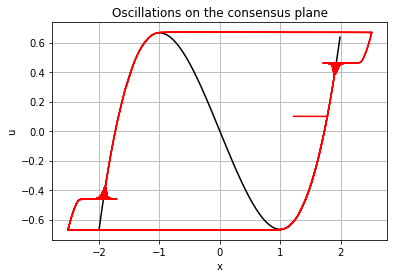

In [14]:
plt.plot(x_range, phi_xu(x_range,0), color='black')
plt.plot(res2.y[0,:], res2.y[N,:], color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.title("Oscillations on the consensus plane")
plt.grid()
mplt2tikz.save("fast_slow_osc.tex")

### Reduced dynamics

The reduced system dynamics are:

\begin{equation}
\begin{aligned}
\dot{x} &= \phi(x,u) = x - \frac{x^3}{3} + u\\
\dot{u} &= -\varepsilon x
\end{aligned}
\end{equation}

In [15]:
red_f = lambda t,x: np.array([-phi_xu(x[0],x[1]), -x[0]*1e-4])
red_res = solve_ivp(fun=red_f, t_span=[0,40000], y0=[1.23,0.5], method="BDF")

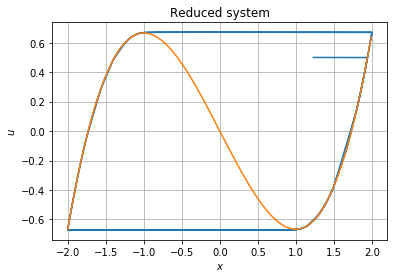

In [16]:
plt.plot(red_res.y[0], red_res.y[1])
plt.plot(x_range, phi_xu(x_range,0))
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
plt.title("Reduced system")
plt.grid(True)
mplt2tikz.save("fast_slow_reduced.tex")